# Load Model



In [1]:
import config

import cv2
import einops
import numpy as np
import torch
import random

from pytorch_lightning import seed_everything
from annotator.util import resize_image, HWC3
from annotator.canny import CannyDetector
from cldm.model import create_model, load_state_dict
from cldm.ddim_hacked import DDIMSampler

from ldm.util import instantiate_from_config
from omegaconf import OmegaConf


apply_canny = CannyDetector()

# config_path = './configs/multi-cldm_v15.yaml'
# config_path = '/home/lolicon/data/experiments/illya-takina-dreambooth/exp2023-05-2100-43-10/configs/2023-05-2100-43-10-project.yaml'
# config_path = '/home/lolicon/data/dreambooth-new/exp2023-05-1922-50-17/configs/2023-05-1922-50-17-project.yaml'
# dreambooth_ckpt_path = '/home/lolicon/data/dreambooth-new/exp2023-05-1922-50-17/checkpoints/last.ckpt'

# dreambooth_ckpt_path = '/home/lolicon/data/experiments/illya-takina-dreambooth/exp2023-05-2100-43-10/configs/2023-05-2100-43-10-project.yaml'
config_path = '/home/lolicon/workspace/CS-Project/configs/multi-cldm_v15-dreambooth.yaml'
# config_path = '/home/lolicon/workspace/CS-Project/configs/multi-cldm_v15-lora.yaml'
# dreambooth_ckpt_path = '/home/lolicon/data/experiments/illya-takina-dreambooth/exp2023-05-2100-43-10/checkpoints/epoch=000175.ckpt'

config = OmegaConf.load(config_path)
model = instantiate_from_config(config['model']).cpu()

torch_device = 'cuda'

# send to device
model = model.to(torch_device)


/home/lolicon/.virtualenvs/ML/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
/home/lolicon/.virtualenvs/ML/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lolicon/.virtualenvs/ML/lib/python3.10/site-packages/pytorch_lightning/utilities/distributed.py:258: LightningDeprecationWarning: `pytorch_lightning.utilities.distributed.rank_zero_only` has been deprecated in v1.8.1 and will be removed in v2.0.0. You can import it from `pytorch_lightning.utilities` instead.
  rank_zero_deprecation(


DreamBooth: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.20.mlp.fc2.weight', 'vision_model.encoder.layers.2.mlp.fc1.bias', 'vision_model.encoder.layers.17.mlp.fc1.weight', 'vision_model.encoder.layers.5.layer_norm2.weight', 'vision_model.encoder.layers.5.mlp.fc1.bias', 'vision_model.encoder.layers.7.layer_norm2.bias', 'vision_model.encoder.layers.7.self_attn.q_proj.bias', 'vision_model.encoder.layers.3.self_attn.v_proj.weight', 'vision_model.encoder.layers.17.layer_norm2.weight', 'vision_model.encoder.layers.5.mlp.fc2.weight', 'vision_model.encoder.layers.8.mlp.fc2.bias', 'vision_model.encoder.layers.5.mlp.fc2.bias', 'vision_model.encoder.layers.15.mlp.fc1.weight', 'vision_model.encoder.layers.10.self_attn.out_proj.weight', 'vision_model.encoder.layers.3.mlp.fc2.bias', 'vision_model.encoder.layers.13.self_attn.k_proj.bias', 'vision_model.encoder.layers.13.mlp.fc2.weight', 'vision_model.encoder.lay

Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is 768 and using 8 heads.
Setting up Me

# Load weight

In [2]:

from utils.model_loader import load_state_dict

# # weight for unet, encoder, decoder, text embedding 
# main_ckpt_path = '../stable-diffusion-webui/models/Stable-diffusion/pastelMixStylizedAnime_pastelMixFull.safetensors'

# # weight for control net 
# ctrl_pose_path = '../stable-diffusion-webui/models/ControlNet/control_sd15_canny.pth'

# sd_ckpt = load_state_dict(main_ckpt_path)
# sd_ctrl = load_state_dict(ctrl_pose_path)
# model.load_multi_state_dict(sd_ckpt, canny_model=sd_ctrl)
# dreambooth_ckpt_path = '/home/lolicon/data/dreambooth/exp2023-05-2304-22-42/checkpoints/epoch=000129.ckpt'
dreambooth_ckpt_path = '/home/lolicon/data/experiments/illya-takina-dreambooth/exp2023-05-2100-43-10/checkpoints/epoch=000175.ckpt'
# dreambooth_ckpt_path = '/home/lolicon/data/vanilla/exp2023-05-2506-01-15/checkpoints/epoch=000185.ckpt'
# sd_ckpt = load_state_dict('/home/lolicon/data/dataset/lycoris/ckpt/epoch=99.ckpt')
sd_ckpt = load_state_dict(dreambooth_ckpt_path)
model.load_state_dict(sd_ckpt)


Loaded state_dict from [/home/lolicon/data/experiments/illya-takina-dreambooth/exp2023-05-2100-43-10/checkpoints/epoch=000175.ckpt]


<All keys matched successfully>

In [5]:
# saving state dict

from utils.model_loader import load_state_dict
from safetensors.torch import save_file

# dreambooth_ckpt_path = '/home/lolicon/data/experiments/illya-takina-dreambooth/exp2023-05-2100-43-10/checkpoints/epoch=000175.ckpt'
# sd_ckpt = load_state_dict('/home/lolicon/data/dataset/lycoris/ckpt/epoch=99.ckpt')
# sd_ckpt = load_state_dict(dreambooth_ckpt_path)


# filename = '/home/lolicon/data/vanilla/exp2023-05-2506-01-15/checkpoints/epoch=000185.ckpt'
# sd_ckpt = load_state_dict(filename)

# output = {}

# for key, value in sd_ckpt.items():
#     if key.startswith('control_model'):
#        output[key.replace('.pose_model.', '.')] = value 

# save_file(output, '/home/lolicon/workspace/stable-diffusion-webui/models/ControlNet/vanilla_pose.pth')



Loaded state_dict from [/home/lolicon/data/vanilla/exp2023-05-2506-01-15/checkpoints/epoch=000185.ckpt]


# Create Sampler

In [3]:
from ldm.models.diffusion.ddim import DDIMSampler
from ldm.models.diffusion.plms import PLMSSampler
from modules.sampler import VanillaStableDiffusionSampler

# webui_sampler = VanillaStableDiffusionSampler(DDIMSampler, model)
orig_sampler = DDIMSampler(model)


# Text to Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cuda
cuda
124766346


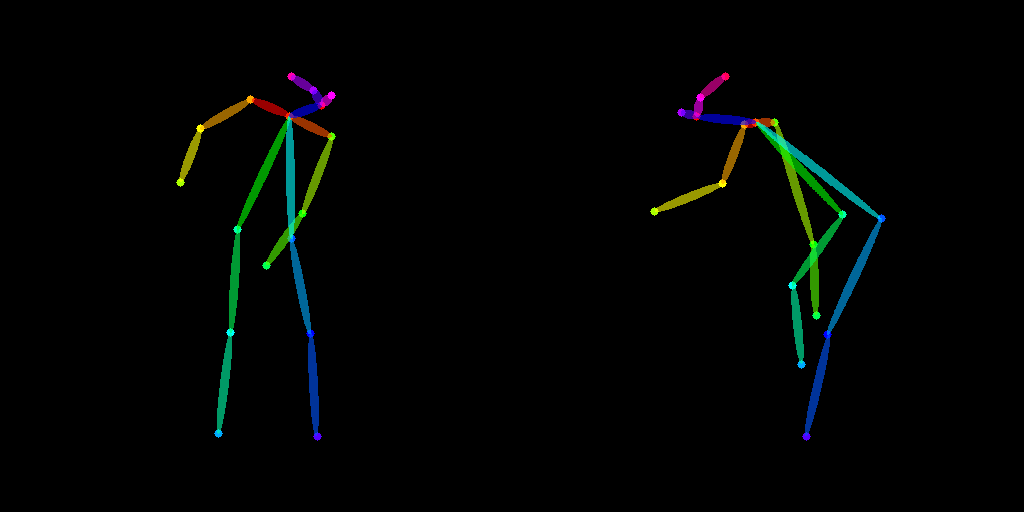

Selected timesteps for ddim sampler: [  1  26  51  76 101 126 151 176 201 226 251 276 301 326 351 376 401 426
 451 476 501 526 551 576 601 626 651 676 701 726 751 776 801 826 851 876
 901 926 951 976]
Selected alphas for ddim sampler: a_t: tensor([0.9985, 0.9756, 0.9507, 0.9229, 0.8931, 0.8608, 0.8262, 0.7900, 0.7520,
        0.7129, 0.6724, 0.6309, 0.5889, 0.5469, 0.5049, 0.4634, 0.4229, 0.3835,
        0.3455, 0.3093, 0.2749, 0.2428, 0.2128, 0.1851, 0.1598, 0.1368, 0.1163,
        0.0980, 0.0819, 0.0679, 0.0557, 0.0453, 0.0366, 0.0292, 0.0231, 0.0181,
        0.0140, 0.0107, 0.0082, 0.0061]); a_(t-1): [0.99902344 0.99853516 0.97558594 0.95068359 0.92285156 0.89306641
 0.86083984 0.82617188 0.79003906 0.75195312 0.71289062 0.67236328
 0.63085938 0.58886719 0.546875   0.50488281 0.46337891 0.42285156
 0.38354492 0.34545898 0.30932617 0.27490234 0.24279785 0.21276855
 0.18505859 0.15979004 0.13684082 0.11633301 0.09802246 0.08190918
 0.06787109 0.0557251  0.04534912 0.03656006 0.0291748

DDIM Sampler: 100%|██████████| 40/40 [00:20<00:00,  1.93it/s]


In [96]:
from utils.prompt_parser import get_learned_conditioning, get_multicond_learned_conditioning
from annotator.util import resize_image, HWC3
from annotator.canny import CannyDetector
from annotator.openpose import OpenposeDetector
from PIL import Image
import numpy as np
import os
import time, random
%load_ext autoreload
%autoreload


apply_canny = CannyDetector()
apply_openpose = OpenposeDetector()

torch_device = 'cuda'

model.to(torch_device)
# prompt = ["A cool digital illustration of a steampunk computer laboratory with clockwork machines, 4k, detailed, trending in artstation, fantasy vivid colors"]
# prompt_negative = [""]
# prompt = ["chisato, masterpiece, best quality, loli, animal ears, blue eyes, seduction, sea, wet,  cute face, long hair, white hair, 1girl, sexy,  8K, high resolution"]
# prompt = ["masterpiece, best quality, seduction, sea, wet, cute face, 1girl, sexy,  8K, high resolution"]
# prompt_negative = ["deformation, ugly, bad quality, distortion"]

prompt = ["masterpiece, best quality"]
prompt_negative = ["easynegative, lowres, text, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, bad anatomy, bad hands, error, missing fingers, extra digits, fewer digits, bad feet, bad colours, missing arms, text, water print, logo"]
random_seed = random.randint(0, 2147483647)

print(random_seed)

num_inference_steps = 40
cfg_scale = 7.5
batch_size = 1

# Positive Text Embedding
positive_text_embeddings = model.get_learned_conditioning(prompt) 
# print(f'the postive text embedding: {positive_text_embeddings}')

# Negative Text Embedding
negative_text_embeddings  = model.get_learned_conditioning(prompt_negative)
# print(f'the negative text embedding: {negative_text_embeddings}')

# Prep latents

root_dir = '/home/lolicon/workspace/dataset/takina'
hint_path = os.path.join(root_dir, 'hint', '2.png')
source_1 = cv2.imread(hint_path)
source_1 = cv2.cvtColor(source_1, cv2.COLOR_BGR2RGB)
source_1 = cv2.resize(source_1, (512, 512))

root_dir = '/home/lolicon/workspace/dataset/takina'
hint_path = os.path.join(root_dir, 'hint', '16.png')
source_2 = cv2.imread(hint_path)
source_2 = cv2.cvtColor(source_2, cv2.COLOR_BGR2RGB)
source_2 = cv2.resize(source_2, (512, 512))

# require source shape to be the same as (height, width)

height = 512
width = 1024


source_1_ = np.zeros((height, width, 3), dtype=np.uint8)
source_1_[:, :512, :] += source_1


source_2_ = np.zeros((height, width, 3), dtype=np.uint8)
source_2_[:, 512:, :] += source_2

display(Image.fromarray(source_1_ + source_2_))



source_1_ = torch.tensor((source_1_.astype(np.float32) / 127.5 - 1.0)).to(torch_device).unsqueeze(0)
source_1_ = einops.rearrange(source_1_, 'b h w c -> b c h w').clone()


source_2_ = torch.tensor((source_2_.astype(np.float32) / 127.5 - 1.0)).to(torch_device).unsqueeze(0)
source_2_ = einops.rearrange(source_2_, 'b h w c -> b c h w').clone()


torch.manual_seed(random_seed)
latents = torch.randn((batch_size, 4, height // 8, width // 8), device='cpu')
latents = latents.to(torch_device)


conditioning={'c_crossattn': [positive_text_embeddings]}
unconditional_conditioning={'c_crossattn': [negative_text_embeddings]}

# def process_control(input_image, image_resolution, num_samples=1, low_threshold=100, high_threshold=200):
#     with torch.no_grad():
#         img = resize_image(HWC3(input_image), image_resolution)
#         H, W, C = img.shape

#         detected_map, _ = apply_openpose(img)
#         # detected_map = apply_canny(img, low_threshold, high_threshold)
#         detected_map = HWC3(detected_map)
#         print(detected_map.shape)
#         display(Image.fromarray(detected_map))
#         control = torch.from_numpy(detected_map.copy()).float().cuda() / 255.0
#         control = torch.stack([control for _ in range(num_samples)], dim=0)
#         control = einops.rearrange(control, 'b h w c -> b c h w').clone()

#     return control

# # control_image = Image.open('./../../data/dataset/blue-archive/character/ブルーアーカイブ0- 2.jpg')
# control_image = Image.open('/home/lolicon/workspace/dataset/Illya/hint/1.png')
# display(control_image)
# canny_1 = process_control(np.array(control_image), image_resolution=512)

# add_prompt_1 = 'an illustration of takina'
# add_prompt_2 = 'an illustration of takina'


add_prompt_2 = 'an illustration of illya'
add_prompt_1 = 'an illustration of takina'


conditioning['pose_1'] = [source_1_]
conditioning['pose_1_text'] = [model.get_learned_conditioning([f"{add_prompt_1}, " + prompt[0]])]

conditioning['pose_2'] = [source_2_]
conditioning['pose_2_text'] = [model.get_learned_conditioning([f"{add_prompt_2}, " + prompt[0]])]


unconditional_conditioning['pose_1'] = [source_1_]
unconditional_conditioning['pose_1_text'] = [negative_text_embeddings]
# unconditional_conditioning['pose_1_text'] = [model.get_learned_conditioning([f"{add_prompt_1}, " + prompt_negative[0]])]

unconditional_conditioning['pose_2'] = [source_2_]
unconditional_conditioning['pose_2_text'] = [negative_text_embeddings]
# unconditional_conditioning['pose_2_text'] =  [model.get_learned_conditioning([f"{add_prompt_2}, " + prompt_negative[0]])]
# unconditional_conditioning['pose_1_text'] = ['illya']


for key in model.control_model.control_scales.keys():
    model.control_model.control_scales[key] = [0.5] * 13 

sample_ddim, intermediates = orig_sampler.sample(S=num_inference_steps, 
                             batch_size=1,
                             shape=(4, height // 8, width // 8),
                             conditioning=conditioning,
                             x_T=latents,
                             unconditional_conditioning=unconditional_conditioning,
                             unconditional_guidance_scale=cfg_scale)



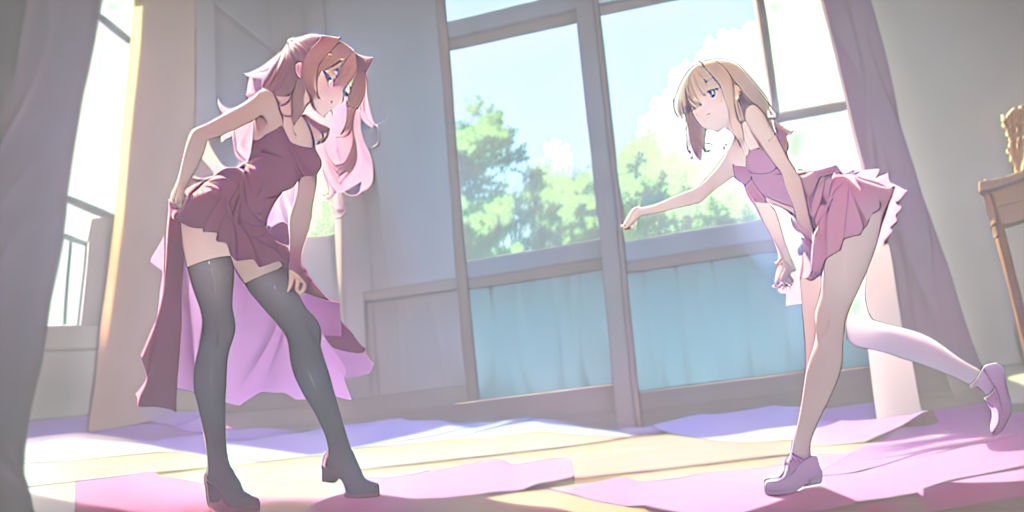

In [97]:
from PIL import Image
# 897968263 1251698217 
# 1617149443 1864321715
image = model.decode_first_stage(sample_ddim)
# image_encode = model.encode_first_stage(image)
# image_encode = model.get_first_stage_encoding(image_encode)
# image = model.decode_first_stage(image_encode)

# Display
image = (image / 2.0 + 0.5).clamp(0, 1)
image = image.detach().cpu().permute(0, 2, 3, 1).numpy()
images = (image * 255).round().astype("uint8")
pil_images = [Image.fromarray(image) for image in images]
pil_images[0]